 # STOCK PRICE PREDICTION 

In [1]:
#importing libraries to be used
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

C:\Users\USER\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 1) Read csv file (WALMART stock price year 1972- 2022)

In [2]:
# data_importing
df = pd.read_csv("Walmart.csv")


### Reading data using parse date

As it is timeseries data so we have to read the data by parsing date means making data column as index.

In [3]:
df1 = pd.read_csv("Walmart.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df1.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1972-08-25,0.063477,0.064697,0.063477,0.064453,0.036447,2508800
1972-08-28,0.064453,0.064941,0.064209,0.064209,0.036309,972800
1972-08-29,0.063965,0.063965,0.063477,0.063477,0.035895,1945600
1972-08-30,0.063477,0.063477,0.062988,0.063477,0.035895,409600
1972-08-31,0.062988,0.062988,0.062500,0.062500,0.035343,870400


In [4]:
# fetching first 10 rows of dataset
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/25/1972,0.063477,0.064697,0.063477,0.064453,0.036447,2508800
1,8/28/1972,0.064453,0.064941,0.064209,0.064209,0.036309,972800
2,8/29/1972,0.063965,0.063965,0.063477,0.063477,0.035895,1945600
3,8/30/1972,0.063477,0.063477,0.062988,0.063477,0.035895,409600
4,8/31/1972,0.062988,0.062988,0.062500,0.062500,0.035343,870400
5,9/1/1972,0.062744,0.062988,0.062744,0.062988,0.035619,256000
6,9/5/1972,0.062988,0.062988,0.062500,0.062500,0.035343,563200
7,9/6/1972,0.062988,0.062988,0.062988,0.062988,0.035619,256000
8,9/7/1972,0.062988,0.062988,0.062744,0.062744,0.035481,1177600
9,9/8/1972,0.062500,0.062500,0.062256,0.062256,0.035205,665600


## 2) Data Exploration & Cleaning

In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
12486,3/2/2022,135.660004,136.830002,135.179993,136.160004,136.160004,7954600
12487,3/3/2022,137.289993,140.470001,136.550003,139.289993,139.289993,9961700
12488,3/4/2022,137.809998,142.940002,137.589996,142.820007,142.820007,11858800
12489,3/7/2022,141.300003,143.630005,140.449997,141.669998,141.669998,15273000
12490,3/7/2022,141.300003,143.630005,140.449997,141.669998,141.669998,14297959


In [6]:
df.shape

(12491, 7)

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,1.249100e+04
mean,35.479198,35.811310,35.151302,35.485380,28.948680,7.540560e+06
std,37.207071,37.519419,36.914186,37.214409,34.585375,6.237162e+06
min,0.015625,0.015625,0.014404,0.015625,0.008889,0.000000e+00
25%,1.386719,1.402344,1.375000,1.386719,0.858323,3.883600e+06
50%,16.437500,16.593750,16.250000,16.375000,10.588767,6.312800e+06
75%,56.395001,57.000000,55.664999,56.316250,40.920847,9.511400e+06
max,153.600006,153.660004,151.660004,152.789993,150.842651,1.318336e+08


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       12491 non-null  object 
 1   Open       12491 non-null  float64
 2   High       12491 non-null  float64
 3   Low        12491 non-null  float64
 4   Close      12491 non-null  float64
 5   Adj Close  12491 non-null  float64
 6   Volume     12491 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 683.2+ KB


In [9]:
# check for non-null values
df.count()

Date         12491
Open         12491
High         12491
Low          12491
Close        12491
Adj Close    12491
Volume       12491
dtype: int64

In [10]:
#checking for the null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
#Check for required columns
df = df[['Date','Open','Close']] 

# converting object dtype of date column to datetime dtype

df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split()[0])) 

In [12]:
df.set_index('Date',drop=True,inplace=True) 
df.head(10)

,Open,Close
Date,,
1972-08-25,0.063477,0.064453
1972-08-28,0.064453,0.064209
1972-08-29,0.063965,0.063477
1972-08-30,0.063477,0.063477
1972-08-31,0.062988,0.062500
1972-09-01,0.062744,0.062988
1972-09-05,0.062988,0.062500
1972-09-06,0.062988,0.062988
1972-09-07,0.062988,0.062744


## 3) Data Visualization

<AxesSubplot:xlabel='Date'>

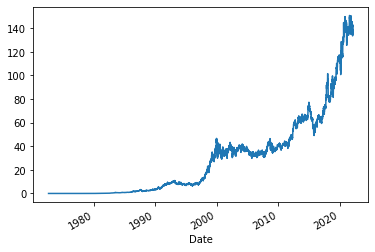

In [13]:
df1['Adj Close'].plot()

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Close'}>]], dtype=object)

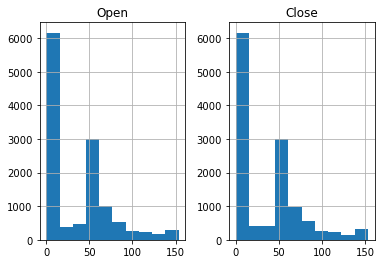

In [14]:
df.hist()


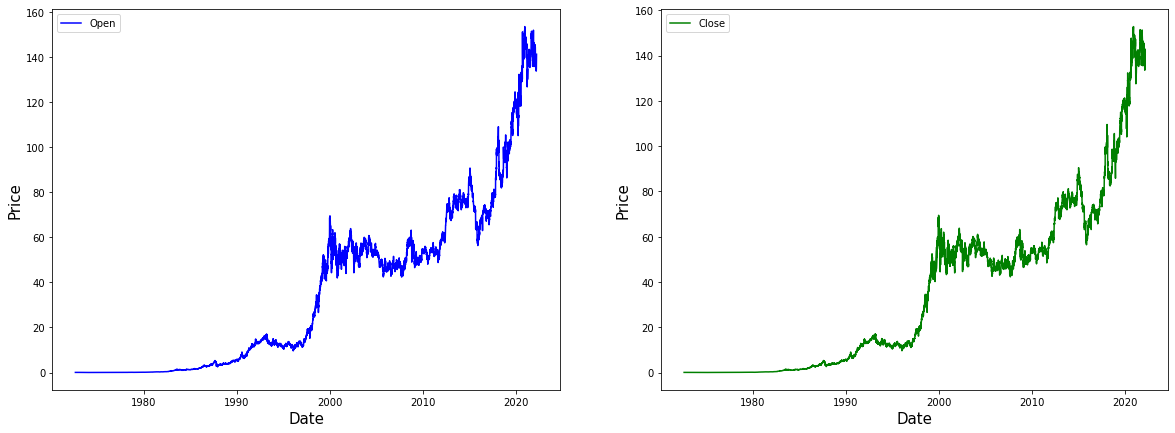

In [15]:
# plotting open and closing price on date index
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='blue')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='green')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

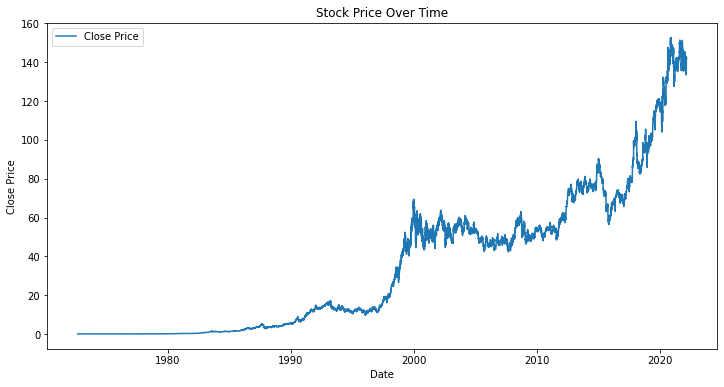

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Over Time')
plt.legend()
plt.show()

## 4) Data Pre-Processing

In [17]:
# normalizing all the values of all columns using MinMaxScaler
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,Open,Close
Date,,
1972-08-25,0.000312,0.000320
1972-08-28,0.000318,0.000318
1972-08-29,0.000315,0.000313
1972-08-30,0.000312,0.000313
1972-08-31,0.000308,0.000307
1972-09-01,0.000307,0.000310
1972-09-05,0.000308,0.000307
1972-09-06,0.000308,0.000310
1972-09-07,0.000308,0.000308


In [18]:
df.tail(10)

,Open,Close
Date,,
2022-02-23,0.891005,0.883881
2022-02-24,0.871797,0.880477
2022-02-25,0.877657,0.892587
2022-02-28,0.878894,0.884601
2022-03-01,0.884559,0.890034
2022-03-02,0.883191,0.891147
2022-03-03,0.893804,0.911634
2022-03-04,0.897190,0.934740
2022-03-07,0.919914,0.927213


In [19]:
# splitting the data into train and test set
# Select 75 % for train and 25 % for test
training_size = round(len(df) * 0.75) 

In [20]:
training_size

9368

In [21]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((9368, 2), (3123, 2))

In [22]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [23]:
train_seq, train_label = create_sequence(train_data) 
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((9318, 50, 2), (9318, 2), (3073, 50, 2), (3073, 2))

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
X = df.drop(['Close'], axis=1)
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [26]:
reg_model = LinearRegression()

reg_model.fit(X_train, y_train)

y_pred = reg_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {mse ** 0.5}")
print(f"R-squared: {r2}")
     

Mean Squared Error: 4.4238754929262704e-05
Root Mean Squared Error: 0.006651222062843993
R-squared: 0.9985355467727686


## 5) CREATING LSTM MODEL

In [27]:
# imported Sequential from keras.models 
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers 
model.add(LSTM(units=25, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=25))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 25)            2800      
                                                                 
 dropout (Dropout)           (None, 50, 25)            0         
                                                                 
 lstm_1 (LSTM)               (None, 25)                5100      
                                                                 
 dense (Dense)               (None, 2)                 52        
                                                                 
Total params: 7952 (31.06 KB)
Trainable params: 7952 (31.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
292/292 [==============================] - 26s 66ms/step - loss: 7.0537e-04 - mean_absolute_error: 0.0109 - val_loss: 0.0059 - val_mean_absolute_error: 0.0474
Epoch 2/100
292/292 [==============================] - 19s 64ms/step - loss: 9.0479e-05 - mean_absolute_error: 0.0054 - val_loss: 0.0065 - val_mean_absolute_error: 0.0503
Epoch 3/100
292/292 [==============================] - 19s 65ms/step - loss: 8.2167e-05 - mean_absolute_error: 0.0051 - val_loss: 0.0072 - val_mean_absolute_error: 0.0558
Epoch 4/100
292/292 [==============================] - 19s 65ms/step - loss: 7.5469e-05 - mean_absolute_error: 0.0051 - val_loss: 0.0071 - val_mean_absolute_error: 0.0554
Epoch 5/100
292/292 [==============================] - 19s 64ms/step - loss: 7.1668e-05 - mean_absolute_error: 0.0049 - val_loss: 0.0066 - val_mean_absolute_error: 0.0516
Epoch 6/100
292/292 [==============================] - 20s 67ms/step - loss: 6.6757e-05 - mean_absolute_error: 0.0048 - val_loss: 0.0090 - val_me

In [29]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

97/97 [==============================] - 3s 18ms/step


array([[0.3483082 , 0.3493209 ],
       [0.34829673, 0.34916943],
       [0.34822816, 0.34904164],
       [0.34964508, 0.35039514],
       [0.3521896 , 0.3528384 ]], dtype=float32)

In [30]:
# Inversing normalization/scaling on predicted data 
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[53.510326, 53.382904],
       [53.508564, 53.359764],
       [53.49803 , 53.34024 ],
       [53.71565 , 53.547024],
       [54.10645 , 53.920288]], dtype=float32)

## 6) VISUALIZING ACTUAL DATA VS PREDICTED DATA

In [31]:
# Merging actual and predicted data for better visualization
df1 = pd.concat([df.iloc[-3073:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-3073:].index)], axis=1)
# Inversing normalization/scaling 

In [32]:
# Inversing normalization/scaling 
df1[['Open','Close']] = MMS.inverse_transform(df1[['Open','Close']])
df1.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2009-12-22,53.459999,53.340000,53.510326,53.382904
2009-12-23,53.450001,53.320000,53.508564,53.359764
2009-12-24,53.419998,53.599998,53.498032,53.340240
2009-12-28,53.790001,53.980000,53.715649,53.547024
2009-12-29,53.970001,54.110001,54.106449,53.920288


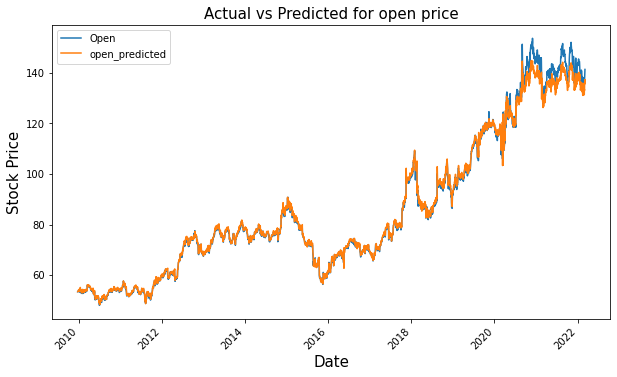

In [33]:
# plotting the actual open and predicted open prices on date index
df1[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()


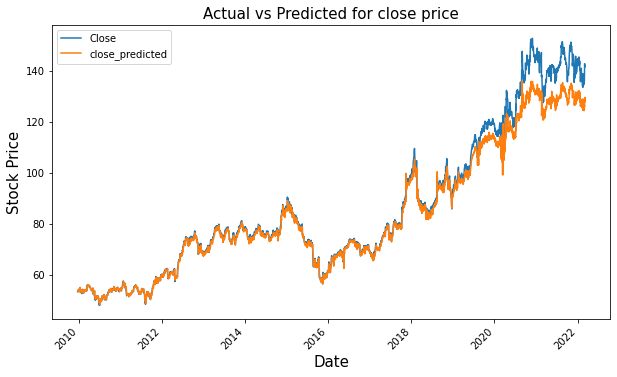

In [34]:
# plotting the actual close and predicted close prices on date index 
df1[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()


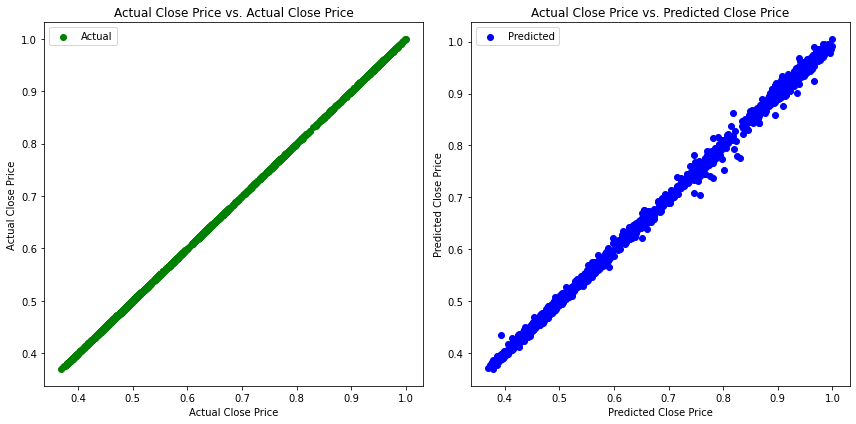

In [35]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test, color='green', label='Actual')
plt.xlabel('Actual Close Price')
plt.ylabel('Actual Close Price')
plt.title('Actual Close Price vs. Actual Close Price')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.xlabel('Predicted Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual Close Price vs. Predicted Close Price')
plt.legend()

plt.tight_layout()
plt.show()

## 7) Predicting forthcoming prediction

In [36]:
df1

,Open,Close,open_predicted,close_predicted
Date,,,,
2009-12-22,53.459999,53.340000,53.510326,53.382904
2009-12-23,53.450001,53.320000,53.508564,53.359764
2009-12-24,53.419998,53.599998,53.498032,53.340240
2009-12-28,53.790001,53.980000,53.715649,53.547024
2009-12-29,53.970001,54.110001,54.106449,53.920288
...,...,...,...,...
2022-03-02,135.660004,136.160004,133.467606,126.611420
2022-03-03,137.289993,139.289993,132.990997,125.960861
2022-03-04,137.809998,142.820007,135.841858,128.603928


In [37]:
# Creating a dataframe and adding 10 days to existing index 

df2 = pd.concat([df1,pd.DataFrame(columns=df1.columns,
                                        index=pd.date_range(start=df1.index[-1], periods=11, freq='D'))],axis=0)
df2['2022-03-03':'2022-04-21']

,Open,Close,open_predicted,close_predicted
2022-03-03,137.289993,139.289993,132.990997,125.960861
2022-03-04,137.809998,142.820007,135.841858,128.603928
2022-03-07,141.300003,141.669998,137.3228,129.609665
2022-03-07,141.300003,141.669998,135.697495,127.871323
2022-03-07,NaN,NaN,NaN,NaN
2022-03-08,NaN,NaN,NaN,NaN
2022-03-09,NaN,NaN,NaN,NaN
2022-03-10,NaN,NaN,NaN,NaN
2022-03-11,NaN,NaN,NaN,NaN
2022-03-12,NaN,NaN,NaN,NaN


In [38]:
# creating a DataFrame and filling values of open and close column
forthcoming_prediction = pd.DataFrame(columns=['open','close'],index=df1.index)
forthcoming_prediction.index=pd.to_datetime(forthcoming_prediction.index)

In [39]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  forthcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 96ms/step


In [40]:
# inversing Normalization/scaling
forthcoming_prediction[['open','close']] = MMS.inverse_transform(forthcoming_prediction)

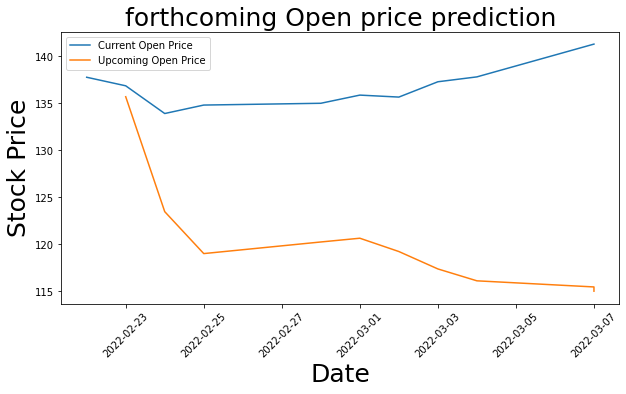

In [41]:
# plotting forthcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df1.loc['2022-02-20':,'Open'],label='Current Open Price')
ax.plot(forthcoming_prediction.loc['2022-02-20':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=25)
ax.set_ylabel('Stock Price',size=25)
ax.set_title('forthcoming Open price prediction',size=25)
ax.legend()
fig.show()


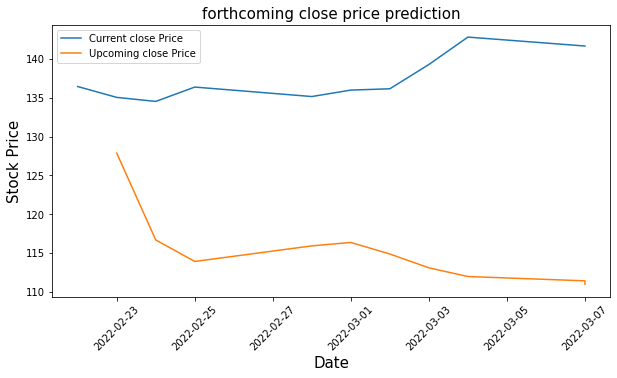

In [42]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df1.loc['2022-02-20':,'Close'],label='Current close Price')
ax.plot(forthcoming_prediction.loc['2022-02-20':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('forthcoming close price prediction',size=15)
ax.legend()
fig.show()

In [43]:
percentage_threshold = 1
threshold = y_test * (percentage_threshold / 100.0)

correct_predictions = (abs(y_test - y_pred) <= threshold).sum()
total_predictions = len(y_test)

accuracy_percentage = (correct_predictions / total_predictions) * 100

print(f"Accuracy within {percentage_threshold}%: {accuracy_percentage:.2f}%")

Accuracy within 1%: 76.75%


# Conclusion

Because there are so many variables that might influence stock prices, it is hard to develop a model that can accurately predict the price by 99% of the time. We cannot therefore expect a perfect model, but the general trend of the anticipated price is consistent with the observed data, allowing the trader to use an indication and make his or her own trading decisions.

By adding more epochs, experimenting with various activation functions, or even altering the model's structure, we can further increase the model's accuracy. as precise

